<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/Strato75/Covid-19_ItalyStats/blob/master/notebooks/per_region_stats.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" />Run in Google Colab</a>
  </td>
</table>

In [1]:
%pylab inline
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_field(groups, sel_regions, field, ms = 4):
    for g in groups.groups:

        x_data = ['-'.join(i.split('T')[0].split('-')[1:]) for i in np.datetime_as_string(groups.get_group(g)['data'].values)]  
        data = groups.get_group(g)[field]

        m = max(data)
        if g in sel_regions:
            plt.plot(x_data, data, 'o-', ms=ms, label='%s, max: %d' %(g,m))

    plt.title(field)
    plt.grid()
    plt.xlabel('Date')
    plt.ylabel('#')
    _ = plt.xticks(rotation=90, ha="right")
    plt.legend()


def get_df_from_json_url(url):
    response = requests.get(url)
    #print(response.text)
    df = pd.read_json(response.text, orient='records')
    return df

In [3]:
raw_it_region_df = get_df_from_json_url('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-regioni.json') 
raw_it_region_df['data'] = pd.to_datetime(raw_it_region_df['data'], format='%Y-%m-%d %H:%M:%S')

### Assign the _minval_ variable to set the number of cases a region must have to plot its statistics

In [4]:
minval = 1000 

In [5]:
groups_regions = raw_it_region_df.groupby('denominazione_regione')

cols = raw_it_region_df.columns
fields = sorted(cols[6:])

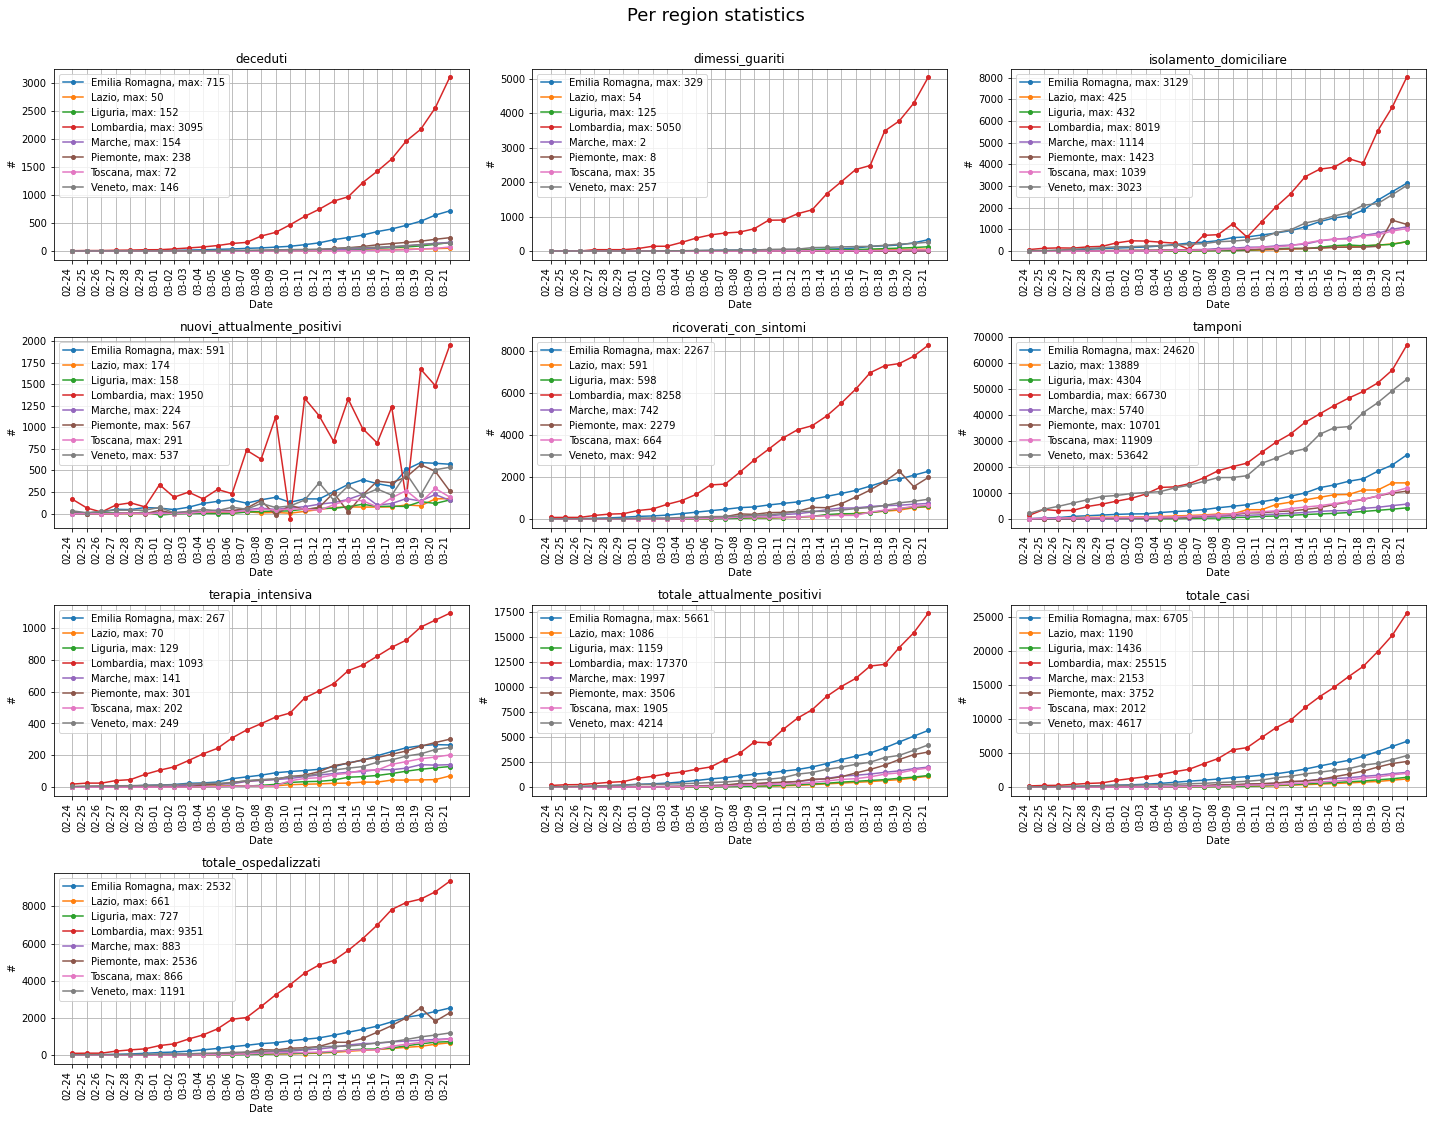

In [6]:
sel_regions = list(raw_it_region_df.loc[raw_it_region_df['totale_casi'] > minval, 'denominazione_regione'].unique())

f = plt.figure(figsize=(20,16))

for index, field in enumerate(fields):
    plt.subplot(4,3,index+1)
    plot_field(groups_regions, sel_regions, field)

plt.tight_layout(rect=[0, 0.01, 1, 0.95])
plt.suptitle("Per region statistics", fontsize=18)

f.savefig('figures/per_region_stats.png', dpi=300, transparency=False, bbox_inches='tight')

### Single region stats

In [7]:
# Region names
print (list(raw_it_region_df['denominazione_regione'].unique()))

['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania', 'Emilia Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta", 'Veneto']


In [8]:
region_name = 'Sardegna' # Put here one of the names printed as output in the previous cell

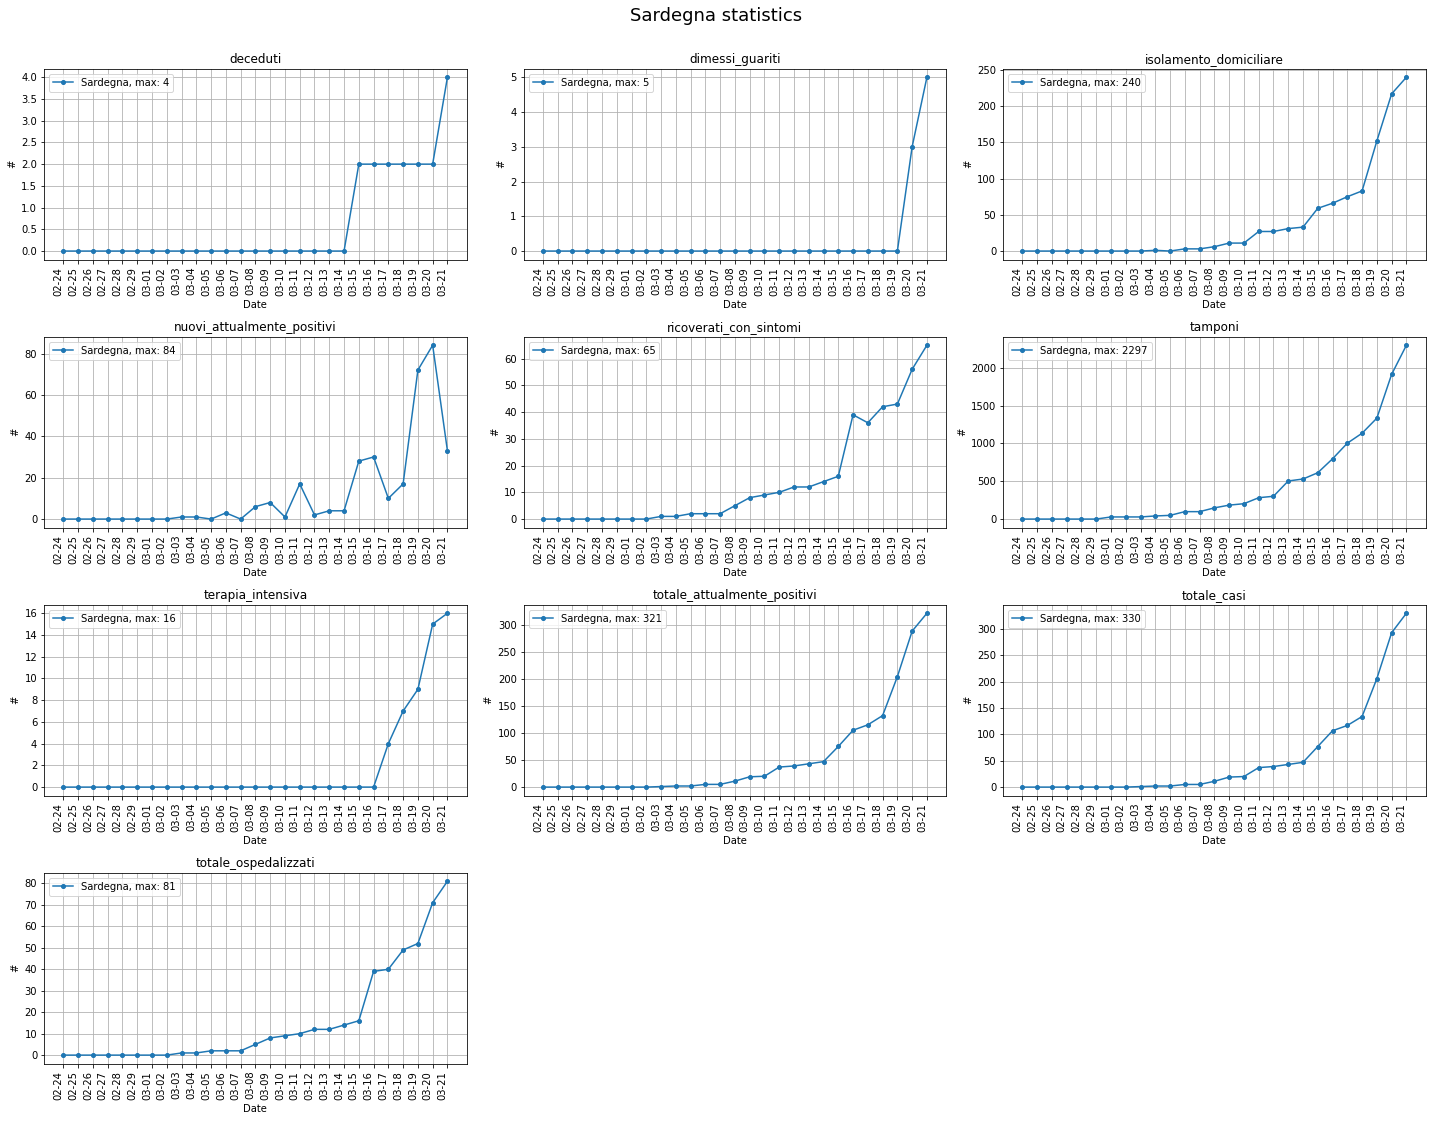

In [9]:
sel_regions = [region_name] 

f = plt.figure(figsize=(20,16))

for index, field in enumerate(fields):
    plt.subplot(4,3,index+1)
    plot_field(groups_regions, sel_regions, field)

plt.tight_layout(rect=[0, 0.01, 1, 0.95])
plt.suptitle("%s statistics" % region_name, fontsize=18)

f.savefig('figures/%s_stats.png' % region_name, dpi=300, transparency=False, bbox_inches='tight')